In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from random import randint

In [2]:
def constFunc(values):
    ans = 0
    idealWeights = [0.3,0.1,-0.8,0.3,1.2]
    for i in range(len(values)):
        ans += values[i]*idealWeights[i]
    return ans + 0.1

In [3]:
# # Creating fake dataset with a simple function, meant to compare final values

# x = []
# y = []

# for samples in range(10):
#     values = []
#     for attribute in range(5):
#         values.append(randint(0,100)/100.0)
#     x.append(values)
#     y.append(constFunc(values))
# print(x,len(x))
# print(y,len(y))

In [25]:
model = Sequential()
model.add(Dense(1, input_shape = (5,)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.weights

[<tf.Variable 'dense_1/kernel:0' shape=(5, 1) dtype=float32, numpy=
 array([[-0.8388939 ],
        [-0.76020694],
        [ 0.04916763],
        [-0.4416232 ],
        [-0.02252746]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [6]:
# inp = np.array(x[0], dtype = np.float32)
# print(inp.shape)
# model.predict(x)

In [7]:
# model.compile(optimizer = 'adam', loss = 'mse')
# model.fit(x,y)

In [8]:
# model.predict(x)

In [9]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(5, 1) dtype=float32, numpy=
 array([[-0.88560677],
        [ 0.3412714 ],
        [ 0.697546  ],
        [ 0.8457904 ],
        [-0.42797112]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [17]:
model.get_layer("dense").get_weights()

[array([[-0.88560677],
        [ 0.3412714 ],
        [ 0.697546  ],
        [ 0.8457904 ],
        [-0.42797112]], dtype=float32),
 array([0.], dtype=float32)]

In [20]:
model.get_layer("dense").set_weights([np.array([[0],
        [ 0.3412714 ],
        [ 0.697546  ],
        [ 0.8457904 ],
        [-0.42797112]], dtype=np.float32),
 np.array([0.], dtype=np.float32)])

In [23]:
new_weights = model.get_layer("dense").get_weights()
new_weights[0][0] = 2
model.get_layer("dense").set_weights(new_weights)

In [24]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(5, 1) dtype=float32, numpy=
 array([[ 2.        ],
        [ 0.3412714 ],
        [ 0.697546  ],
        [ 0.8457904 ],
        [-0.42797112]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [10]:
# weightMatrix = []
# weightMatrix.append(np.array(model.get_weights()))

In [11]:
# print(weightMatrix[0])
# for i in weightMatrix[0]:
#     print(i)
#     ar = np.array(i)
#     for j in ar:
#         print(j)
#         print()
# #     print()


In [12]:
# Creating fake dataset with a simple function, meant to compare final values

x = []
y = []

for samples in range(100000):
    values = []
    for attribute in range(5):
        values.append(randint(1000,90000)/100000)
    x.append(values)
    y.append(constFunc(values))
print(len(x),x[:5])
print(len(y),y[:5])

100000 [[0.28942, 0.77142, 0.72836, 0.86659, 0.72339], [0.83849, 0.52423, 0.39102, 0.68412, 0.85743], [0.49561, 0.85078, 0.55544, 0.55169, 0.61453], [0.51119, 0.09894, 0.68912, 0.72874, 0.0152], [0.49847, 0.22944, 0.45801, 0.41901, 0.79251]]
100000 [0.809325, 1.3253059999999999, 0.7923519999999998, -0.051183000000000006, 0.9827919999999999]


In [27]:
model.compile(optimizer = 'adam', loss = 'mse')
trackingArray = []
for i in range(0,100000,10):
    model.fit(x[i:i+20],y[i:i+20])
    trackingArray.append(np.array(model.get_weights()))
# trackingArray = np.asarray(trackingArray)
# print(trackingArray.shape)
print(len(trackingArray))

1/1 [==============================] - 0s 1ms/step - loss: 1.5848


1/1 [==============================] - 0s 2ms/step - loss: 1.0684


1/1 [==============================] - 0s 1ms/step - loss: 0.5411


1/1 [==============================] - 0s 942us/step - loss: 0.3967


1/1 [==============================] - 0s 1ms/step - loss: 0.3071


1/1 [==============================] - 0s 1ms/step - loss: 0.1436


1/1 [==============================] - 0s 916us/step - loss: 0.1991


1/1 [==============================] - 0s 2ms/step - loss: 0.1391


1/1 [==============================] - 0s 1ms/step - loss: 0.1429


1/1 [==============================] - 0s 1ms/step - loss: 0.0921


1/1 [==============================] - 0s 1ms/step - loss: 0.1718


1/1 [==============================] - 0s 1ms/step - loss: 0.0734


1/1 [==============================] - 0s 1ms/step - loss: 0.1014


1/1 [==============================] - 0s 1ms/step - loss: 0.0660


1/1 [==============================] - 0s 1ms/step - loss: 0.0888


1/1 [==============================] - 0s 1ms/step - loss: 0.0811


1/1 [==============================] - 0s 1ms/step - loss: 0.0445


1/1 [==============================] - 0s 1ms/step - loss: 0.0889


1/1 [==============================] - 0s 1ms/step - loss: 0.0728


1/1 [==============================] - 0s 1ms/step - loss: 0.0547


1/1 [==============================] - 0s 1ms/step - loss: 0.0354


1/1 [==============================] - 0s 1ms/step - loss: 0.0343


1/1 [==============================] - 0s 994us/step - loss: 0.0378


1/1 [==============================] - 0s 2ms/step - loss: 0.0274


1/1 [==============================] - 0s 2ms/step - loss: 0.0199


1/1 [==============================] - 0s 2ms/step - loss: 0.0164


1/1 [==============================] - 0s 1ms/step - loss: 0.0100


1/1 [==============================] - 0s 1ms/step - loss: 0.0194


1/1 [==============================] - 0s 1ms/step - loss: 0.0128


1/1 [==============================] - 0s 1ms/step - loss: 0.0145


1/1 [==============================] - 0s 1ms/step - loss: 0.0048


1/1 [==============================] - 0s 1ms/step - loss: 0.0104


1/1 [==============================] - 0s 1ms/step - loss: 0.0050


1/1 [==============================] - 0s 942us/step - loss: 0.0048


1/1 [==============================] - 0s 1ms/step - loss: 0.0050


1/1 [==============================] - 0s 987us/step - loss: 0.0036


1/1 [==============================] - 0s 1ms/step - loss: 0.0022


1/1 [==============================] - 0s 1ms/step - loss: 0.0022


1/1 [==============================] - 0s 2ms/step - loss: 0.0025


1/1 [==============================] - 0s 1ms/step - loss: 0.0014


1/1 [==============================] - 0s 1ms/step - loss: 0.0010


1/1 [==============================] - 0s 1ms/step - loss: 9.5721e-04


1/1 [==============================] - 0s 2ms/step - loss: 5.5382e-04


1/1 [==============================] - 0s 1ms/step - loss: 7.3322e-04


1/1 [==============================] - 0s 2ms/step - loss: 5.9991e-04


1/1 [==============================] - 0s 968us/step - loss: 3.3483e-04


1/1 [==============================] - 0s 1ms/step - loss: 4.9620e-04


1/1 [==============================] - 0s 899us/step - loss: 2.4207e-04


1/1 [==============================] - 0s 1ms/step - loss: 1.7824e-04


1/1 [==============================] - 0s 1ms/step - loss: 1.3581e-04


1/1 [==============================] - 0s 961us/step - loss: 1.8852e-04


1/1 [==============================] - 0s 1ms/step - loss: 1.6989e-04


1/1 [==============================] - 0s 1ms/step - loss: 1.1709e-04


1/1 [==============================] - 0s 957us/step - loss: 3.4183e-05


1/1 [==============================] - 0s 1ms/step - loss: 4.1844e-05


1/1 [==============================] - 0s 939us/step - loss: 2.5012e-05


1/1 [==============================] - 0s 1ms/step - loss: 3.0814e-05


1/1 [==============================] - 0s 1ms/step - loss: 9.2224e-06


1/1 [==============================] - 0s 1ms/step - loss: 9.5724e-06


1/1 [==============================] - 0s 1ms/step - loss: 8.1946e-06


1/1 [==============================] - 0s 2ms/step - loss: 4.0789e-06


1/1 [==============================] - 0s 3ms/step - loss: 2.0371e-06


1/1 [==============================] - 0s 1ms/step - loss: 1.3666e-06


1/1 [==============================] - 0s 980us/step - loss: 6.7171e-07


1/1 [==============================] - 0s 1ms/step - loss: 3.0939e-07


1/1 [==============================] - 0s 965us/step - loss: 2.6845e-07


1/1 [==============================] - 0s 2ms/step - loss: 1.3320e-07


1/1 [==============================] - 0s 1ms/step - loss: 4.2632e-08


1/1 [==============================] - 0s 986us/step - loss: 4.8224e-08


1/1 [==============================] - 0s 1ms/step - loss: 1.5521e-08


1/1 [==============================] - 0s 997us/step - loss: 6.1459e-09


1/1 [==============================] - 0s 986us/step - loss: 2.8712e-09


1/1 [==============================] - 0s 971us/step - loss: 5.2435e-10


1/1 [==============================] - 0s 1ms/step - loss: 2.7873e-10


1/1 [==============================] - 0s 1ms/step - loss: 1.0515e-10


1/1 [==============================] - 0s 1ms/step - loss: 3.0353e-11


1/1 [==============================] - 0s 1ms/step - loss: 2.1365e-11


1/1 [==============================] - 0s 2ms/step - loss: 3.2168e-12


1/1 [==============================] - 0s 3ms/step - loss: 1.3548e-12


1/1 [==============================] - 0s 2ms/step - loss: 7.8449e-13


1/1 [==============================] - 0s 1ms/step - loss: 4.7791e-13


1/1 [==============================] - 0s 1ms/step - loss: 3.2718e-13


1/1 [==============================] - 0s 1ms/step - loss: 3.6875e-13


1/1 [==============================] - 0s 998us/step - loss: 2.5624e-13
10000


In [28]:
print(model.predict(x[:10]))
print("\n\n\n\n\n",y[:10])

[[ 0.8093244 ]
 [ 1.3253052 ]
 [ 0.79235166]
 [-0.05118212]
 [ 0.98279136]
 [ 1.034296  ]
 [ 0.51307666]
 [ 0.32082218]
 [ 0.5649415 ]
 [ 1.0844343 ]]





 [0.809325, 1.3253059999999999, 0.7923519999999998, -0.051183000000000006, 0.9827919999999999, 1.034297, 0.5130769999999999, 0.32082199999999994, 0.5649409999999999, 1.0844340000000001]


In [29]:
print(trackingArray[-1])
print("ideal:", [0.3,0.1,-0.8,0.3,1.2])

[array([[ 0.29999992],
       [ 0.09999992],
       [-0.8000005 ],
       [ 0.29999998],
       [ 1.1999979 ]], dtype=float32)
 array([0.10000132], dtype=float32)]
ideal: [0.3, 0.1, -0.8, 0.3, 1.2]


In [30]:
npTA = np.array(trackingArray)

In [49]:
# attribute1 = npTA[:,0,0]
# print(attribute1.shape)
# print(attribute1[:10])
a1 = []
for i in range(int(npTA.shape[0])):
    a1.append(float(npTA[i][0][0]))
print(len(a1))
print(a1[:10])

10000
[-0.18118628859519958, -0.18020819127559662, -0.17933480441570282, -0.1786377727985382, -0.17810137569904327, -0.1774943470954895, -0.17687122523784637, -0.17638114094734192, -0.17610476911067963, -0.17590656876564026]


In [32]:
import matplotlib.pyplot as plt
plt.plot(a1)

NameError: name 'a1' is not defined

In [51]:
a2 = []
for i in range(int(npTA.shape[0])):
    a2.append(float(npTA[i][0][1]))
print(len(a2))
print(a2[:10])

10000
[0.2905656099319458, 0.2913394570350647, 0.2916957437992096, 0.291491836309433, 0.29099369049072266, 0.29063791036605835, 0.29032522439956665, 0.28978174924850464, 0.28910592198371887, 0.28846773505210876]


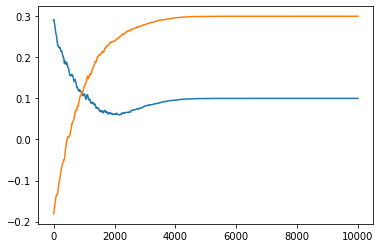

In [58]:
plt.plot(a2)
plt.plot(a1)
# plt.plot(npTA[:][0][:])

10000
[0.19322508573532104, 0.19222408533096313, 0.19122423231601715, 0.19022244215011597, 0.1892453283071518, 0.1883864849805832, 0.18753080070018768, 0.18664932250976562, 0.18573027849197388, 0.18480299413204193]


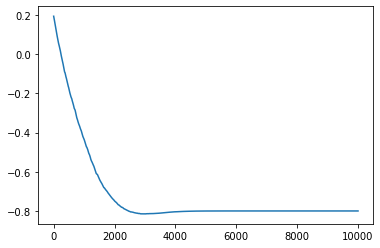

In [53]:
a3 = []
for i in range(int(npTA.shape[0])):
    a3.append(float(npTA[i][0][2]))
print(len(a3))
print(a3[:10])
plt.plot(a3)

10000
[0.4503272473812103, 0.45118892192840576, 0.4516298174858093, 0.4516306221485138, 0.45148786902427673, 0.45160871744155884, 0.4517868161201477, 0.4518282413482666, 0.4516701102256775, 0.4515187740325928]


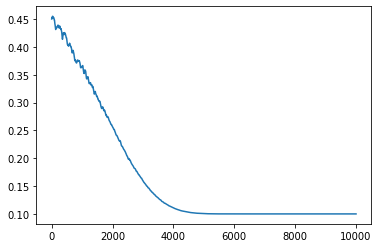

In [54]:
bias = []
for i in range(int(npTA.shape[0])):
    bias.append(float(npTA[i][1][0]))
print(len(bias))
print(bias[:10])
plt.plot(bias)

In [55]:
print(model.get_weights())
print("ideal weights:{}, bias = 0.1".format([0.3,0.1,-0.8,0.3,1.2]))

[array([[ 0.29999986],
       [ 0.09999999],
       [-0.8000001 ],
       [ 0.3000001 ],
       [ 1.1999995 ]], dtype=float32), array([0.10000025], dtype=float32)]
ideal weights:[0.3, 0.1, -0.8, 0.3, 1.2], bias = 0.1


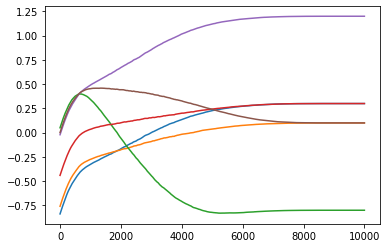

In [33]:
plots = [[],[],[],[],[],[]]
for i in range(int(npTA.shape[0])):
    for ind in range(5):
        plots[ind].append(float(npTA[i][0][ind]))
    plots[5].append(float(npTA[i][1][0]))
for i in plots:
    plt.plot(i)

In [34]:
model.weights

[<tf.Variable 'dense_1/kernel:0' shape=(5, 1) dtype=float32, numpy=
 array([[ 0.29999992],
        [ 0.09999992],
        [-0.8000005 ],
        [ 0.29999998],
        [ 1.1999979 ]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.10000132], dtype=float32)>]

In [36]:
new_weights = model.get_layer("dense_1").get_weights()
new_weights[0][0] = 0.8
model.get_layer("dense_1").set_weights(new_weights)

In [37]:
model.weights

[<tf.Variable 'dense_1/kernel:0' shape=(5, 1) dtype=float32, numpy=
 array([[ 0.8       ],
        [ 0.09999992],
        [-0.8000005 ],
        [ 0.29999998],
        [ 1.1999979 ]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.10000132], dtype=float32)>]

In [ ]:
model.compile(optimizer = 'adam', loss = 'mse')
trackingArray = []
for i in range(0,10000,10):
    model.fit(x[i:i+20],y[i:i+20])
    trackingArray.append(np.array(model.get_weights()))
# trackingArray = np.asarray(trackingArray)
# print(trackingArray.shape)
print(len(trackingArray))

1/1 [==============================] - 0s 2ms/step - loss: 0.0100


1/1 [==============================] - 0s 799us/step - loss: 0.0094


1/1 [==============================] - 0s 940us/step - loss: 0.0059


1/1 [==============================] - 0s 741us/step - loss: 0.0052


1/1 [==============================] - 0s 826us/step - loss: 0.0024


1/1 [==============================] - 0s 865us/step - loss: 0.0029
